In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_excel('/content/drive/MyDrive/ml_project/Heart Disease.xlsx')
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0            30          No  Female        55-59  White      Yes   
1             0          No  Female  80 or older  White       No   
2            30          No    Male        65-69  White      Yes   
3             0          No  Female        75-79  White       No   
4             0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1              Yes  Very good          7     No            No         No  
2              Yes       Fair          8    Yes            No         No  
3               No       Good          6     No            No        Yes  
4              Yes  Very good          8     No            No         No

In [3]:
df.shape


(319795, 18)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

Data preprocessing for balancing since it is **UNBALANCED**


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
list=['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for i in list:
    df[i]=le.fit_transform(df[i])

In [13]:
df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0              20   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0              28   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0            30            0    0            7     5         2   
1             0            0    0           12     5         0   
2            30            0    1            9     5         2   
3             0            0    0           11     5         0   
4             0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4          5       1              0           1  
1                 1          4          7       0              0           0  
2                 1          1          8       1              0           0  
3                 0          2          6       0              0           1  
4                 1          4          8       0              0           0

In [14]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [15]:
x.sample(10)


BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
239498  28.50        1                0       1              20             0   
124963  25.79        1                0       0               0            20   
274027  28.70        0                0       0               0             2   
104795  38.97        1                0       0               0             7   
79447   24.49        0                0       0               0             0   
239051  46.99        0                0       0              30             0   
128866  36.81        1                0       0              12            10   
28888   29.05        0                0       0               0             0   
95651   34.56        1                0       0               0             0   
160855  23.11        0                0       0               0             0   

        DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
239498            1    1           12     5         0                 1   
124963            0    0            9     5         0                 0   
274027            0    1            2     5         0                 1   
104795            0    0            4     5         1                 1   
79447             0    1            8     3         0                 0   
239051            1    1           10     5         2                 1   
128866            1    1            6     5         2                 0   
28888             0    0            7     5         0                 1   
95651             0    1            2     5         0                 1   
160855            0    1            1     5         0                 1   

        GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
239498          2          7       0              0           0  
124963          4          8       0              0           0  
274027          4          7       1              0           0  
104795          4          8       0              0           0  
79447           2          5       0              0           0  
239051          1          6       0              0           0  
128866          3          6       0              0           0  
28888           2          7       0              0           0  
95651           4          5       0              0           0  
160855          4          8       1              0           0

UNDERSAMPLING

In [16]:
from imblearn.under_sampling import NearMiss
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [17]:
new_y

0        0
1        0
2        0
3        0
4        0
        ..
54741    1
54742    1
54743    1
54744    1
54745    1
Name: HeartDisease, Length: 54746, dtype: int64

In [18]:
new_y.value_counts()


HeartDisease
0    27373
1    27373
Name: count, dtype: int64

In [19]:
df2=pd.DataFrame(new_x)
df2.head()

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0  25.10        0                0       0               0             0   
1  22.24        1                0       0               0             0   
2  26.63        0                0       0               0             0   
3  25.10        0                0       0               0             0   
4  26.63        0                0       0               0             0   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0            0    1            9     5         0                 1          4   
1            0    1           11     5         0                 1          4   
2            0    0           12     5         0                 1          2   
3            0    1            9     5         0                 1          4   
4            0    0           12     5         0                 1          2   

   SleepTime  Asthma  KidneyDisease  SkinCancer  
0          7       0              0           0  
1          7       0              0           0  
2          8       0              0           0  
3          7       0              0           0  
4          8       0              0           0

In [20]:
df3=pd.DataFrame(new_y)
df3.head()


HeartDisease
0             0
1             0
2             0
3             0
4             0

In [21]:
df4=pd.concat([df2,df3],axis=1)
df4

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0      25.10        0                0       0               0             0   
1      22.24        1                0       0               0             0   
2      26.63        0                0       0               0             0   
3      25.10        0                0       0               0             0   
4      26.63        0                0       0               0             0   
...      ...      ...              ...     ...             ...           ...   
54741  38.45        0                0       1              30            15   
54742  36.21        1                0       0               0             0   
54743  37.12        1                0       0               0             0   
54744  33.20        1                0       0               0             0   
54745  27.41        1                0       0               7             0   

       DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
0                0    1            9     5         0                 1   
1                0    1           11     5         0                 1   
2                0    0           12     5         0                 1   
3                0    1            9     5         0                 1   
4                0    0           12     5         0                 1   
...            ...  ...          ...   ...       ...               ...   
54741            1    0            7     3         2                 1   
54742            1    0           11     3         2                 1   
54743            0    1            3     3         0                 1   
54744            0    0            8     3         2                 1   
54745            1    1            8     3         2                 0   

       GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  HeartDisease  
0              4          7       0              0           0             0  
1              4          7       0              0           0             0  
2              2          8       0              0           0             0  
3              4          7       0              0           0             0  
4              2          8       0              0           0             0  
...          ...        ...     ...            ...         ...           ...  
54741          3          6       1              0           0             1  
54742          2          8       0              0           0             1  
54743          4          7       0              0           0             1  
54744          4          8       1              0           0             1  
54745          1          6       1              0           0             1  

[54746 rows x 18 columns]

DECISION TREE

In [22]:
from sklearn.ensemble import ExtraTreesClassifier # Decison tree
extr = ExtraTreesClassifier()
extr.fit(new_x,new_y)


ExtraTreesClassifier()

In [23]:
feature_importance = extr.feature_importances_
feature_importance

array([0.24096813, 0.00955248, 0.00717613, 0.03713266, 0.13480487,
       0.07790227, 0.11738693, 0.00629094, 0.03426195, 0.04480873,
       0.07166023, 0.06742934, 0.04422004, 0.03686225, 0.03765677,
       0.02060669, 0.01127959])

In [24]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp.head(10)


Gain_Score
0    0.240968
1    0.009552
2    0.007176
3    0.037133
4    0.134805
5    0.077902
6    0.117387
7    0.006291
8    0.034262
9    0.044809

In [25]:
new_x.columns


Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [26]:
cols = pd.DataFrame(new_x.columns, columns=['Feature_Names'])
cols.head(10)

Feature_Names
0              BMI
1          Smoking
2  AlcoholDrinking
3           Stroke
4   PhysicalHealth
5     MentalHealth
6      DiffWalking
7              Sex
8      AgeCategory
9             Race

In [27]:
gains = pd.concat([cols,imp],axis=1)
gains

Feature_Names  Gain_Score
0                BMI    0.240968
1            Smoking    0.009552
2    AlcoholDrinking    0.007176
3             Stroke    0.037133
4     PhysicalHealth    0.134805
5       MentalHealth    0.077902
6        DiffWalking    0.117387
7                Sex    0.006291
8        AgeCategory    0.034262
9               Race    0.044809
10          Diabetic    0.071660
11  PhysicalActivity    0.067429
12         GenHealth    0.044220
13         SleepTime    0.036862
14            Asthma    0.037657
15     KidneyDisease    0.020607
16        SkinCancer    0.011280

In [28]:
newx = gains.nlargest(18,'Gain_Score')
newx


Feature_Names  Gain_Score
0                BMI    0.240968
4     PhysicalHealth    0.134805
6        DiffWalking    0.117387
5       MentalHealth    0.077902
10          Diabetic    0.071660
11  PhysicalActivity    0.067429
9               Race    0.044809
12         GenHealth    0.044220
14            Asthma    0.037657
3             Stroke    0.037133
13         SleepTime    0.036862
8        AgeCategory    0.034262
15     KidneyDisease    0.020607
16        SkinCancer    0.011280
1            Smoking    0.009552
2    AlcoholDrinking    0.007176
7                Sex    0.006291

<Axes: xlabel='Gain_Score', ylabel='Feature_Names'>

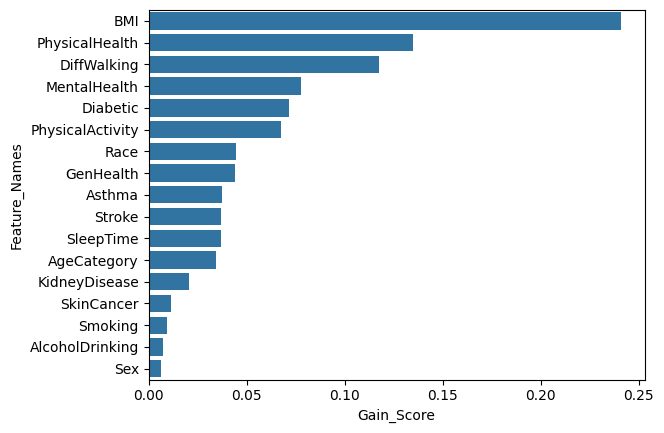

In [29]:
sns.barplot(x='Gain_Score',y='Feature_Names',data=newx)


<Axes: >

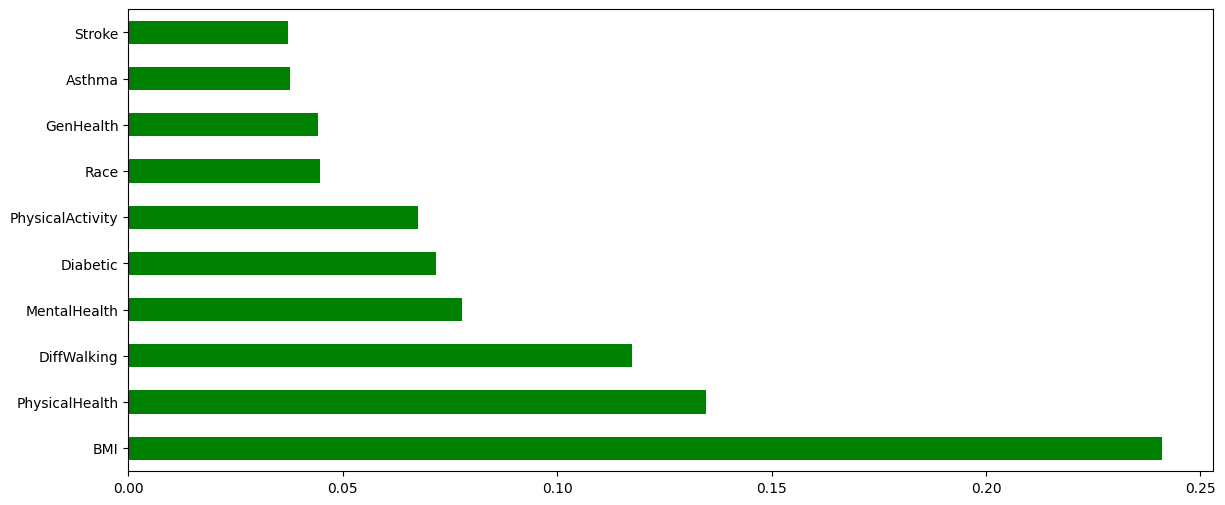

In [30]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(14,6))
features.nlargest(10).plot(kind='barh', color='g')

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression #chi2 only when features are non negative

In [32]:
model2 = SelectKBest(score_func=f_classif)
feature_score = model2.fit(new_x,new_y)
feature_score.scores_


array([3.75440127e+03, 2.03552236e+03, 6.95297966e+02, 4.83533549e+03,
       1.25312036e+04, 6.96957949e+03, 1.36347702e+04, 2.23507248e+02,
       2.12111452e+00, 4.54938853e+03, 9.24225452e+03, 9.11220252e+03,
       1.44917353e+03, 4.00600240e+02, 4.86418830e+03, 3.66576795e+03,
       9.91111023e+02])

In [33]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

Feature_Scores
0      3754.401268
1      2035.522364
2       695.297966
3      4835.335493
4     12531.203572
5      6969.579494
6     13634.770216
7       223.507248
8         2.121115
9      4549.388533
10     9242.254520
11     9112.202523
12     1449.173526
13      400.600240
14     4864.188299
15     3665.767952
16      991.111023

In [34]:
col2 = pd.DataFrame(new_x.columns, columns=['Feature_Names'])
col2.head()

Feature_Names
0              BMI
1          Smoking
2  AlcoholDrinking
3           Stroke
4   PhysicalHealth

In [35]:
scores = pd.concat([col2,cols],axis=1)
scores

Feature_Names  Feature_Scores
0                BMI     3754.401268
1            Smoking     2035.522364
2    AlcoholDrinking      695.297966
3             Stroke     4835.335493
4     PhysicalHealth    12531.203572
5       MentalHealth     6969.579494
6        DiffWalking    13634.770216
7                Sex      223.507248
8        AgeCategory        2.121115
9               Race     4549.388533
10          Diabetic     9242.254520
11  PhysicalActivity     9112.202523
12         GenHealth     1449.173526
13         SleepTime      400.600240
14            Asthma     4864.188299
15     KidneyDisease     3665.767952
16        SkinCancer      991.111023

In [36]:
new = scores.nlargest(18,'Feature_Scores')
new

Feature_Names  Feature_Scores
6        DiffWalking    13634.770216
4     PhysicalHealth    12531.203572
10          Diabetic     9242.254520
11  PhysicalActivity     9112.202523
5       MentalHealth     6969.579494
14            Asthma     4864.188299
3             Stroke     4835.335493
9               Race     4549.388533
0                BMI     3754.401268
15     KidneyDisease     3665.767952
1            Smoking     2035.522364
12         GenHealth     1449.173526
16        SkinCancer      991.111023
2    AlcoholDrinking      695.297966
13         SleepTime      400.600240
7                Sex      223.507248
8        AgeCategory        2.121115

Text(0.5, 1.0, 'Feature ranking using SelectKBest classifier')

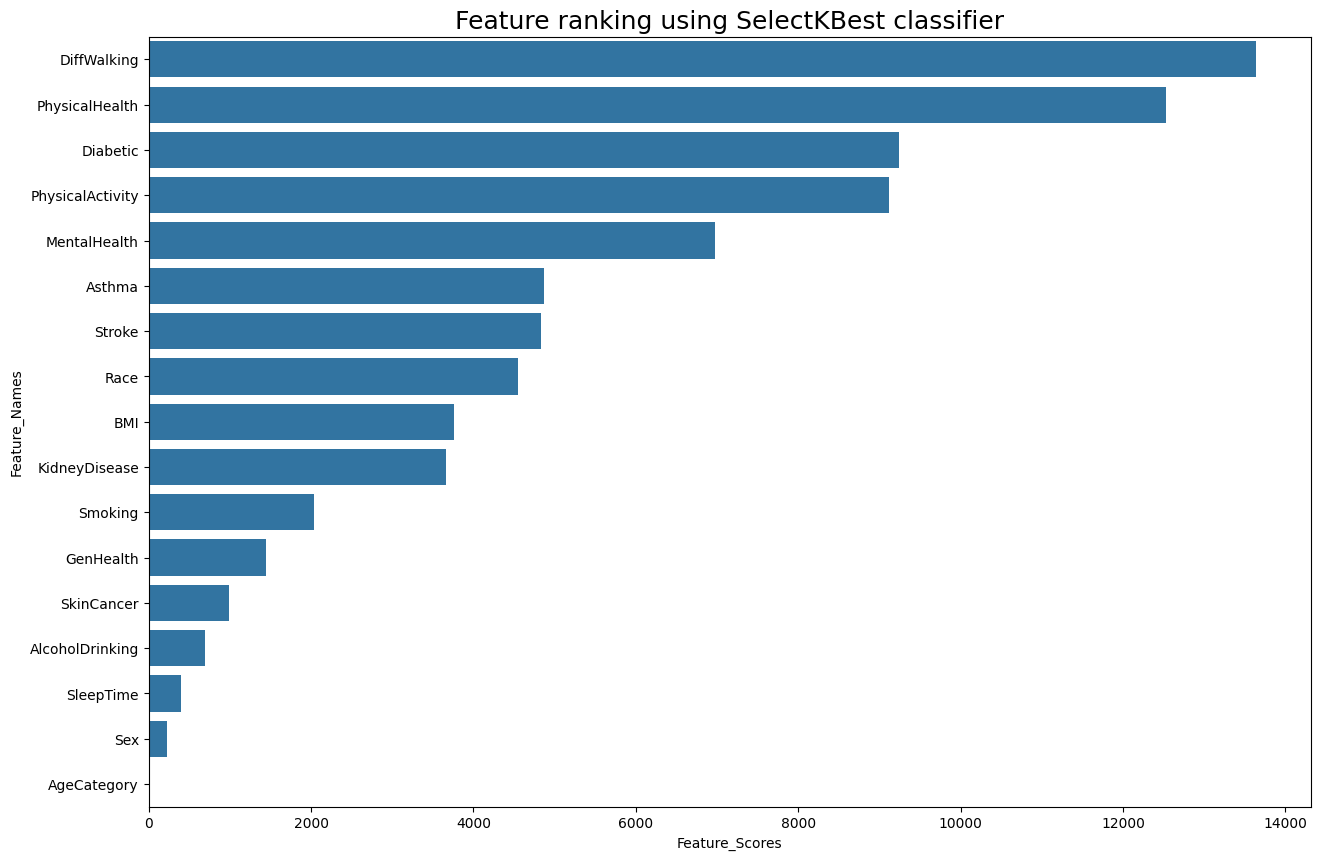

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x='Feature_Scores',y='Feature_Names',data=new)
plt.title('Feature ranking using SelectKBest classifier',fontsize=18)

PCA

In [38]:
#FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler()
scaled_x = mmx.fit_transform(new_x)


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)
x_pca


array([[-0.66189778, -0.02120894,  0.29702488],
       [-0.25531847,  0.6498457 , -0.31888643],
       [-0.37867518, -0.74643734, -0.25384386],
       ...,
       [-0.23144408,  0.65957632, -0.28594832],
       [ 0.30978133, -0.11683497, -0.80244112],
       [ 1.24147939,  0.43433291,  0.48569291]])

In [40]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])


In [41]:
import plotly.express as pl
pl.scatter_3d(features, x='pca1',y='pca2',z='pca3', color='pca1')

EDA FOR BALANCED DATA

<Axes: xlabel='Smoking', ylabel='count'>

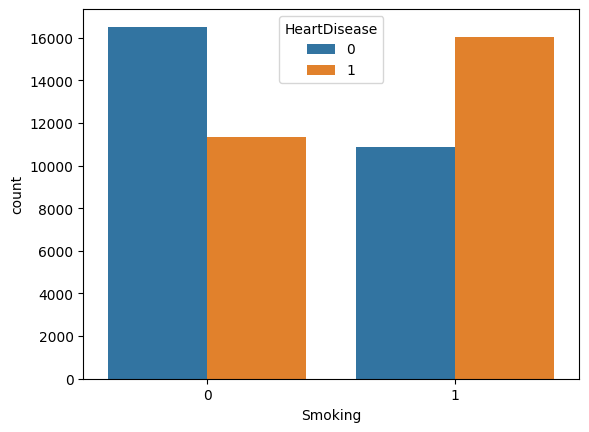

In [42]:
sns.countplot(x='Smoking',hue='HeartDisease',data=df4)


In [43]:
def KDE(x):
    facet=sns.FacetGrid(df4,hue="HeartDisease",aspect=4)
    facet.map(sns.kdeplot,x,shade=True)
    facet.set(xlim=(df4[x].min(),df4[x].max()))
    facet.add_legend()
    plt.show()

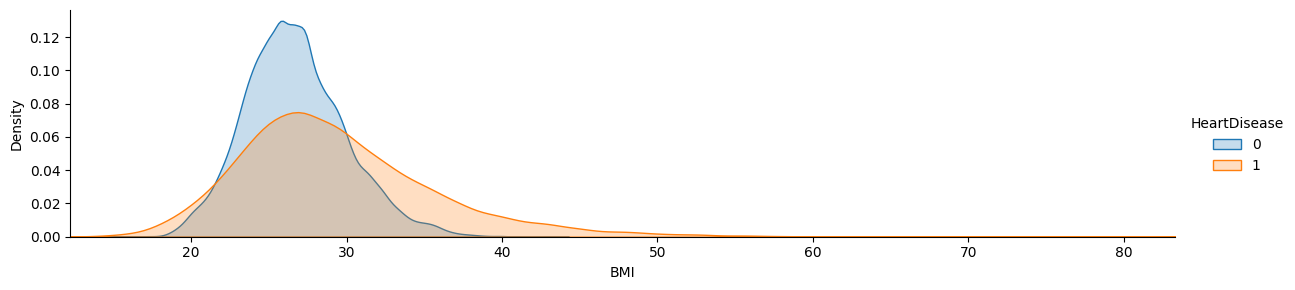

In [44]:
KDE('BMI')


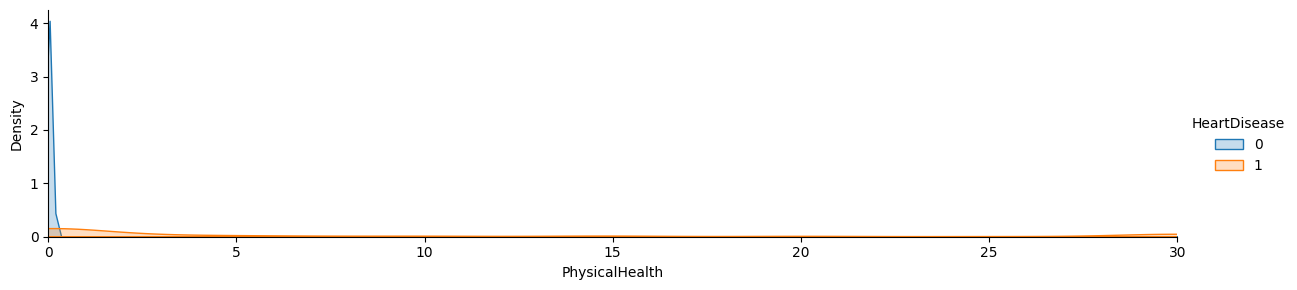

In [45]:
KDE('PhysicalHealth')


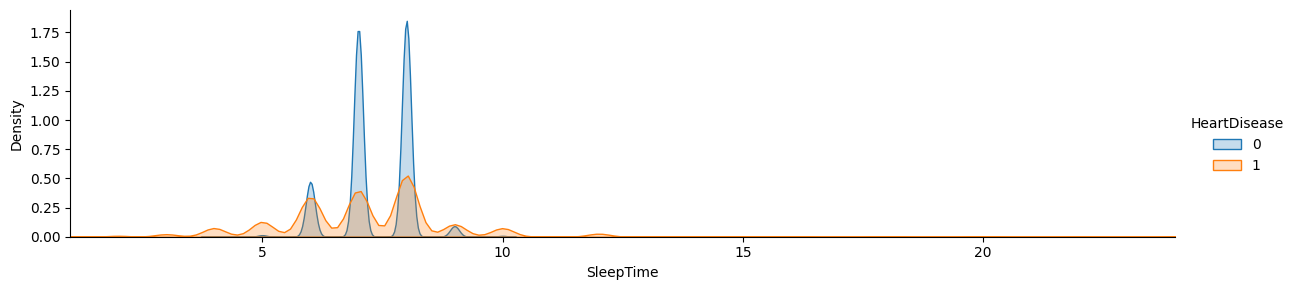

In [46]:
KDE('SleepTime')


In [47]:
df4.corr()


BMI   Smoking  AlcoholDrinking    Stroke  \
BMI               1.000000  0.049441         0.014670  0.068767   
Smoking           0.049441  1.000000         0.092053  0.076455   
AlcoholDrinking   0.014670  0.092053         1.000000  0.024267   
Stroke            0.068767  0.076455         0.024267  1.000000   
PhysicalHealth    0.192687  0.133507         0.039746  0.236168   
MentalHealth      0.145983  0.112300         0.072052  0.171132   
DiffWalking       0.257873  0.128243         0.026511  0.256971   
Sex               0.066262  0.101611         0.008041 -0.045099   
AgeCategory      -0.185498  0.005786        -0.059917  0.015393   
Race             -0.114441 -0.028858        -0.012962 -0.140675   
Diabetic          0.293306  0.099076        -0.007564  0.169159   
PhysicalActivity -0.210051 -0.128546        -0.042995 -0.172935   
GenHealth        -0.031508 -0.014393        -0.000983 -0.067838   
SleepTime        -0.067029 -0.025905        -0.002374 -0.018876   
Asthma            0.164275  0.067483         0.024382  0.132583   
KidneyDisease     0.120651  0.042515         0.000318  0.137583   
SkinCancer       -0.018091  0.026792         0.009680  0.043969   
HeartDisease      0.253337  0.189340         0.111989  0.284882   

                  PhysicalHealth  MentalHealth  DiffWalking       Sex  \
BMI                     0.192687      0.145983     0.257873  0.066262   
Smoking                 0.133507      0.112300     0.128243  0.101611   
AlcoholDrinking         0.039746      0.072052     0.026511  0.008041   
Stroke                  0.236168      0.171132     0.256971 -0.045099   
PhysicalHealth          1.000000      0.440993     0.520376 -0.089319   
MentalHealth            0.440993      1.000000     0.325887 -0.114732   
DiffWalking             0.520376      0.325887     1.000000 -0.134294   
Sex                    -0.089319     -0.114732    -0.134294  1.000000   
AgeCategory            -0.039676     -0.168178     0.070244 -0.114715   
Race                   -0.149459     -0.156602    -0.178967  0.071277   
Diabetic                0.264498      0.169367     0.300179 -0.004047   
PhysicalActivity       -0.365403     -0.237850    -0.412700  0.099627   
GenHealth              -0.082941     -0.065910    -0.113529 -0.016024   
SleepTime              -0.105898     -0.138065    -0.075224  0.018666   
Asthma                  0.240992      0.209618     0.245212 -0.100898   
KidneyDisease           0.237105      0.137120     0.240233 -0.046308   
SkinCancer              0.053826      0.013027     0.068561  0.066207   
HeartDisease            0.431588      0.336057     0.446543 -0.063767   

                  AgeCategory      Race  Diabetic  PhysicalActivity  \
BMI                 -0.185498 -0.114441  0.293306         -0.210051   
Smoking              0.005786 -0.028858  0.099076         -0.128546   
AlcoholDrinking     -0.059917 -0.012962 -0.007564         -0.042995   
Stroke               0.015393 -0.140675  0.169159         -0.172935   
PhysicalHealth      -0.039676 -0.149459  0.264498         -0.365403   
MentalHealth        -0.168178 -0.156602  0.169367         -0.237850   
DiffWalking          0.070244 -0.178967  0.300179         -0.412700   
Sex                 -0.114715  0.071277 -0.004047          0.099627   
AgeCategory          1.000000  0.128077  0.034799         -0.061437   
Race                 0.128077  1.000000 -0.170362          0.143604   
Diabetic             0.034799 -0.170362  1.000000         -0.237781   
PhysicalActivity    -0.061437  0.143604 -0.237781          1.000000   
GenHealth            0.048086  0.073850 -0.086368          0.085209   
SleepTime            0.165630  0.066569 -0.035786          0.038776   
Asthma              -0.096953 -0.141057  0.158339         -0.162920   
KidneyDisease        0.046253 -0.085409  0.224841         -0.174271   
SkinCancer           0.217923  0.079320  0.032502         -0.022121   
HeartDisease         0.006225 -0.276996  0.380054         -0.377755   

           

<Axes: >

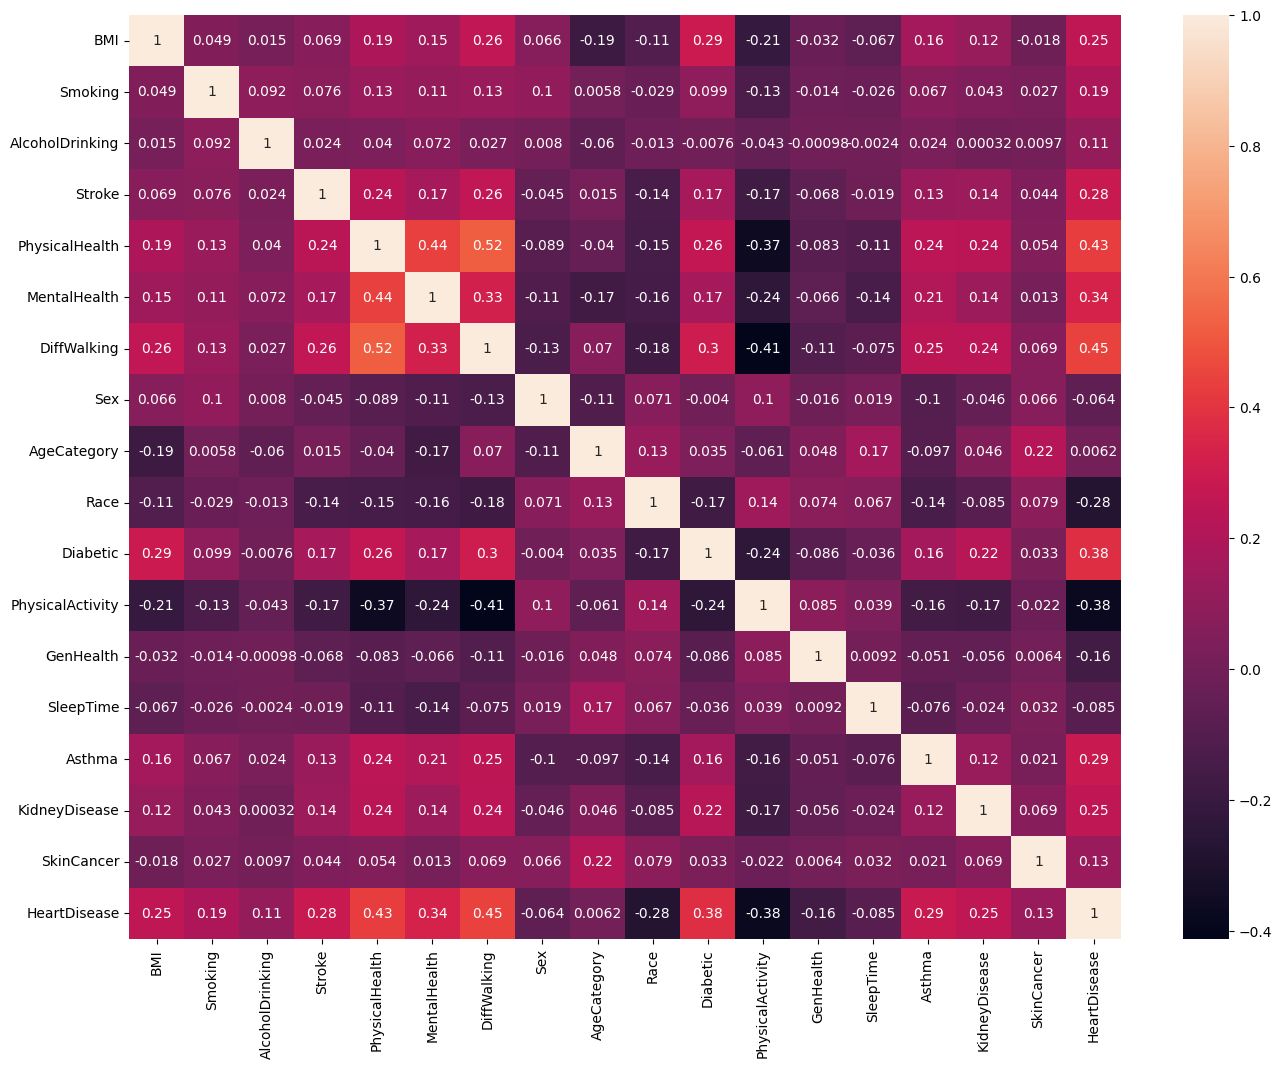

In [48]:
plt.figure(figsize=(16,12))
sns.heatmap(df4.corr(),annot=True)

**SPLIT DATASET INTO TRAIN AND TEST**

In [49]:
from sklearn.model_selection import train_test_split


In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(new_x,new_y,train_size=0.75,random_state=42)
xtest.head(25)


BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
13501  26.54        0                0       0               0             0   
15356  25.46        0                0       0               0             0   
11209  31.63        1                0       0               0             0   
13251  23.63        1                0       0               0             0   
27143  25.62        0                0       0               0             0   
23543  21.80        0                0       0               0             0   
53055  34.33        1                0       0               0             0   
24954  25.80        0                0       0               0             0   
45950  21.52        1                0       0               0             0   
22977  30.04        0                0       0               0             0   
16311  24.75        0                0       0               0             0   
39908  29.57        1                0       0               0             0   
3272   27.48        1                0       0               0             0   
29500  21.11        0                0       0              15            15   
19044  28.06        0                0       0               0             0   
6348   25.09        1                0       0               0             0   
27159  23.44        0                0       0               0             0   
38035  34.01        0                0       0               3             1   
38851  40.94        1                0       1              25            30   
12691  25.00        1                0       0               0             0   
51261  28.80        1                0       0               0             0   
15215  23.40        0                0       0               0             0   
42017  51.15        0                0       0              25            25   
26879  32.11        1                0       0               0             0   
2969   24.82        1                0       0               0             0   

       DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
13501            0    1            6     5         0                 1   
15356            0    1           12     5         0                 1   
11209            0    1           11     5         2                 1   
13251            0    0            7     5         0                 1   
27143            0    1            8     5         0                 1   
23543            0    0           12     5         0                 1   
53055            1    0           11     5         0                 1   
24954            0    1            9     4         0                 1   
45950            0    1           10     5         0                 0   
22977            0    1            8     5         0                 1   
16311            0    0           11     5         0                 1   
39908            0    1            8     5         0                 1   
3272             0    1            9     2         0                 1   
29500            0    1            8     5         0                 1   
19044            0    0            9     5         0                 1   
6348             0    1            8     5         0                 1   
27159            0    0           12     5         0                 1   
38035            0    0            7     5         0                 1   
38851            0    0            5     0         2                 0   
12691            1    1           12     5         0                 0   
51261            0    1            9     5         0                 0   
15215            0    0           10     5         0                 1   
42017            1    0           11     5         0                 0   
26879            0    1            9     5         0                 1   
2969             0    1           11     5         0                 1   

   

In [52]:
ytest.head(25)


13501    0
15356    0
11209    0
13251    0
27143    0
23543    0
53055    1
24954    0
45950    1
22977    0
16311    0
39908    1
3272     0
29500    1
19044    0
6348     0
27159    0
38035    1
38851    1
12691    0
51261    1
15215    0
42017    1
26879    0
2969     0
Name: HeartDisease, dtype: int64

In [54]:
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf=DecisionTreeClassifier()
xgb = XGBClassifier()
ada=AdaBoostClassifier()
neigh=KNeighborsClassifier(n_neighbors= 50)
log=LogisticRegression()
svm = SVC(kernel='linear')
rt = RandomForestClassifier()

In [56]:
def model(xtrain,ytrain,xtest,ytest):
    model_name=['LogisticRegression','KNNClaccification','AdaBoostClassifier','DecisionTreeClassifier','XGBClassifier','SVM','RandomForestClassifier']
    accuracy=[]
    train_accuracy=[]

    #LogisticRegression
    log.fit(xtrain,ytrain)
    accuracy.append(log.score(xtest,ytest))
    train_accuracy.append(log.score(xtrain,ytrain))

    #KNNClassification
    neigh.fit(xtrain,ytrain)
    accuracy.append(neigh.score(xtest,ytest))
    train_accuracy.append(neigh.score(xtrain,ytrain))


    #AdaBoostClassification
    ada.fit(xtrain,ytrain)
    accuracy.append(ada.score(xtest,ytest))
    train_accuracy.append(ada.score(xtrain,ytrain))


    #DecisionTreeClassifier
    clf.fit(xtrain,ytrain)
    accuracy.append(clf.score(xtest,ytest))
    train_accuracy.append(clf.score(xtrain,ytrain))

    #XGBClassifier
    xgb.fit(xtrain,ytrain)
    accuracy.append(clf.score(xtest,ytest))
    train_accuracy.append(xgb.score(xtrain,ytrain))

    #SVM
    svm.fit(xtrain, ytrain)
    accuracy.append(svm.score(xtest,ytest))
    train_accuracy.append(svm.score(xtrain,ytrain))

    #Random Forest Classifier
    rt.fit(xtrain, ytrain)
    accuracy.append(rt.score(xtest,ytest))
    train_accuracy.append(rt.score(xtrain,ytrain))

    return model_name,accuracy,train_accuracy


In [62]:
model_name,test,train=model(xtrain,ytrain,xtest,ytest)

In [63]:
train

[0.8723787720110086,
 0.8399376506977764,
 0.8639762293285272,
 0.9830731386541318,
 0.9099831949146351,
 0.8668257872817166,
 0.9829513626732264]

In [64]:
test

[0.874552495068313,
 0.8421129538978592,
 0.8668809819536787,
 0.8419668298385329,
 0.8419668298385329,
 0.868196098487616,
 0.8546065609702638]

In [65]:
def dataframe(y):
    vis={'Algorithm':['LogisticRegression','KNNClaccification','AdaBoostClassifier','DecisionTreeClassifier','XGBClassifier','SVM','RandomForestClassifier'],
     'Accuracy':y

    }
    accuracy=pd.DataFrame(vis)
    return accuracy


<Axes: title={'center': 'Trainging Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

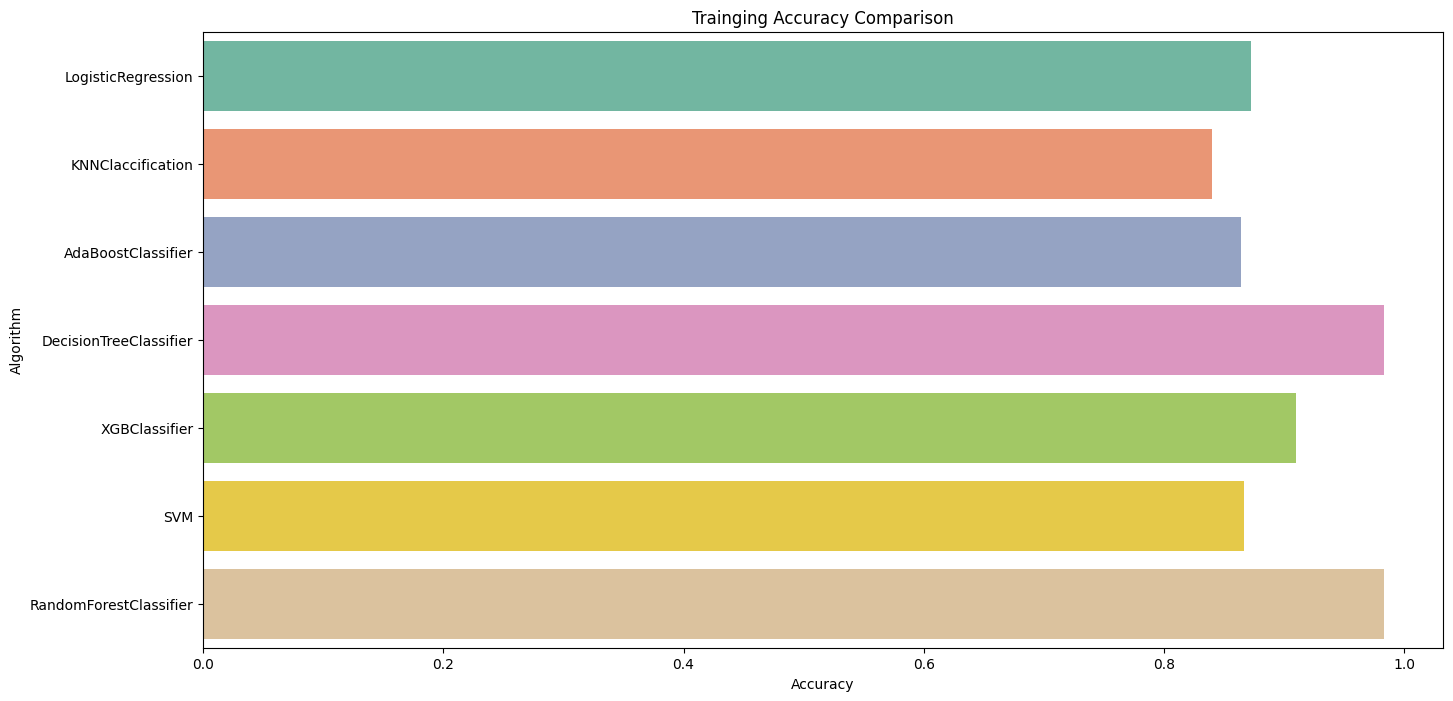

In [66]:
data2=dataframe(train)
plt.figure(figsize=(16,8))

plt.title('Trainging Accuracy Comparison')
sns.barplot(y="Algorithm",x='Accuracy',data=data2,palette='Set2')

<Axes: title={'center': 'Testing Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

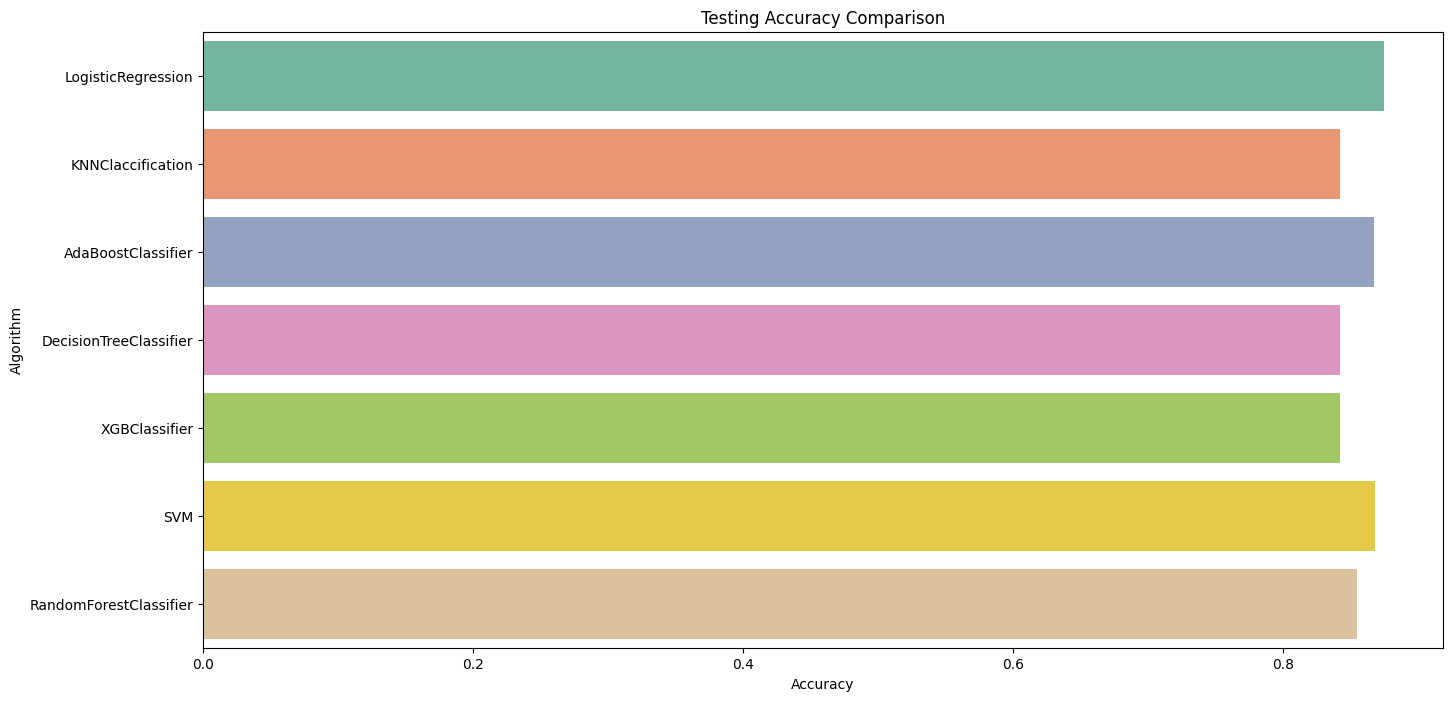

In [67]:
data=dataframe(test)
plt.figure(figsize=(16,8))

plt.title('Testing Accuracy Comparison')
sns.barplot(y="Algorithm",x='Accuracy',data=data,palette='Set2')

CLASSIFICATION REPORT COMPARISON

In [69]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve

In [70]:
pred_log=log.predict(xtest)
pred_dclf=clf.predict(xtest)
pred_xgb=xgb.predict(xtest)
pred_ada=ada.predict(xtest)
pred_neigh=neigh.predict(xtest)
pred_svm=svm.predict(xtest)
pred_rfc=rt.predict(xtest)

In [71]:
print("Report of Logistic Regression:\n\n",classification_report(ytest, pred_log))
print("Report of XGboost Classification:\n\n",classification_report(ytest, pred_xgb))
print("Report of Adaboost Classificaiton:\n\n",classification_report(ytest, pred_ada))
print("Report of Knearest Neighbour Classificaiton:\n\n",classification_report(ytest, pred_neigh))
print("Report of Support Vector Machine Classification:\n\n",classification_report(ytest, pred_svm))
print("Report of Random Forest Classification:\n\n",classification_report(ytest, pred_rfc))

print("Report of Decision Tree:\n\n",classification_report(ytest, pred_dclf))

Report of Logistic Regression:

               precision    recall  f1-score   support

           0       0.83      0.94      0.88      6825
           1       0.93      0.81      0.87      6862

    accuracy                           0.87     13687
   macro avg       0.88      0.87      0.87     13687
weighted avg       0.88      0.87      0.87     13687

Report of XGboost Classification:

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      6825
           1       0.94      0.85      0.89      6862

    accuracy                           0.90     13687
   macro avg       0.90      0.90      0.90     13687
weighted avg       0.90      0.90      0.90     13687

Report of Adaboost Classificaiton:

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      6825
           1       0.94      0.79      0.86      6862

    accuracy                           0.87     13687
   macro avg       0.8

CONFUSION MATRIX COMPARISON

In [72]:
cm_log=confusion_matrix(ytest,pred_log)
cm_dclf=confusion_matrix(ytest,pred_dclf)
cm_xgb=confusion_matrix(ytest,pred_xgb)
cm_ada=confusion_matrix(ytest,pred_ada)
cm_neigh=confusion_matrix(ytest,pred_neigh)
cm_svm=confusion_matrix(ytest,pred_svm)
cm_rfc=confusion_matrix(ytest,pred_rfc)

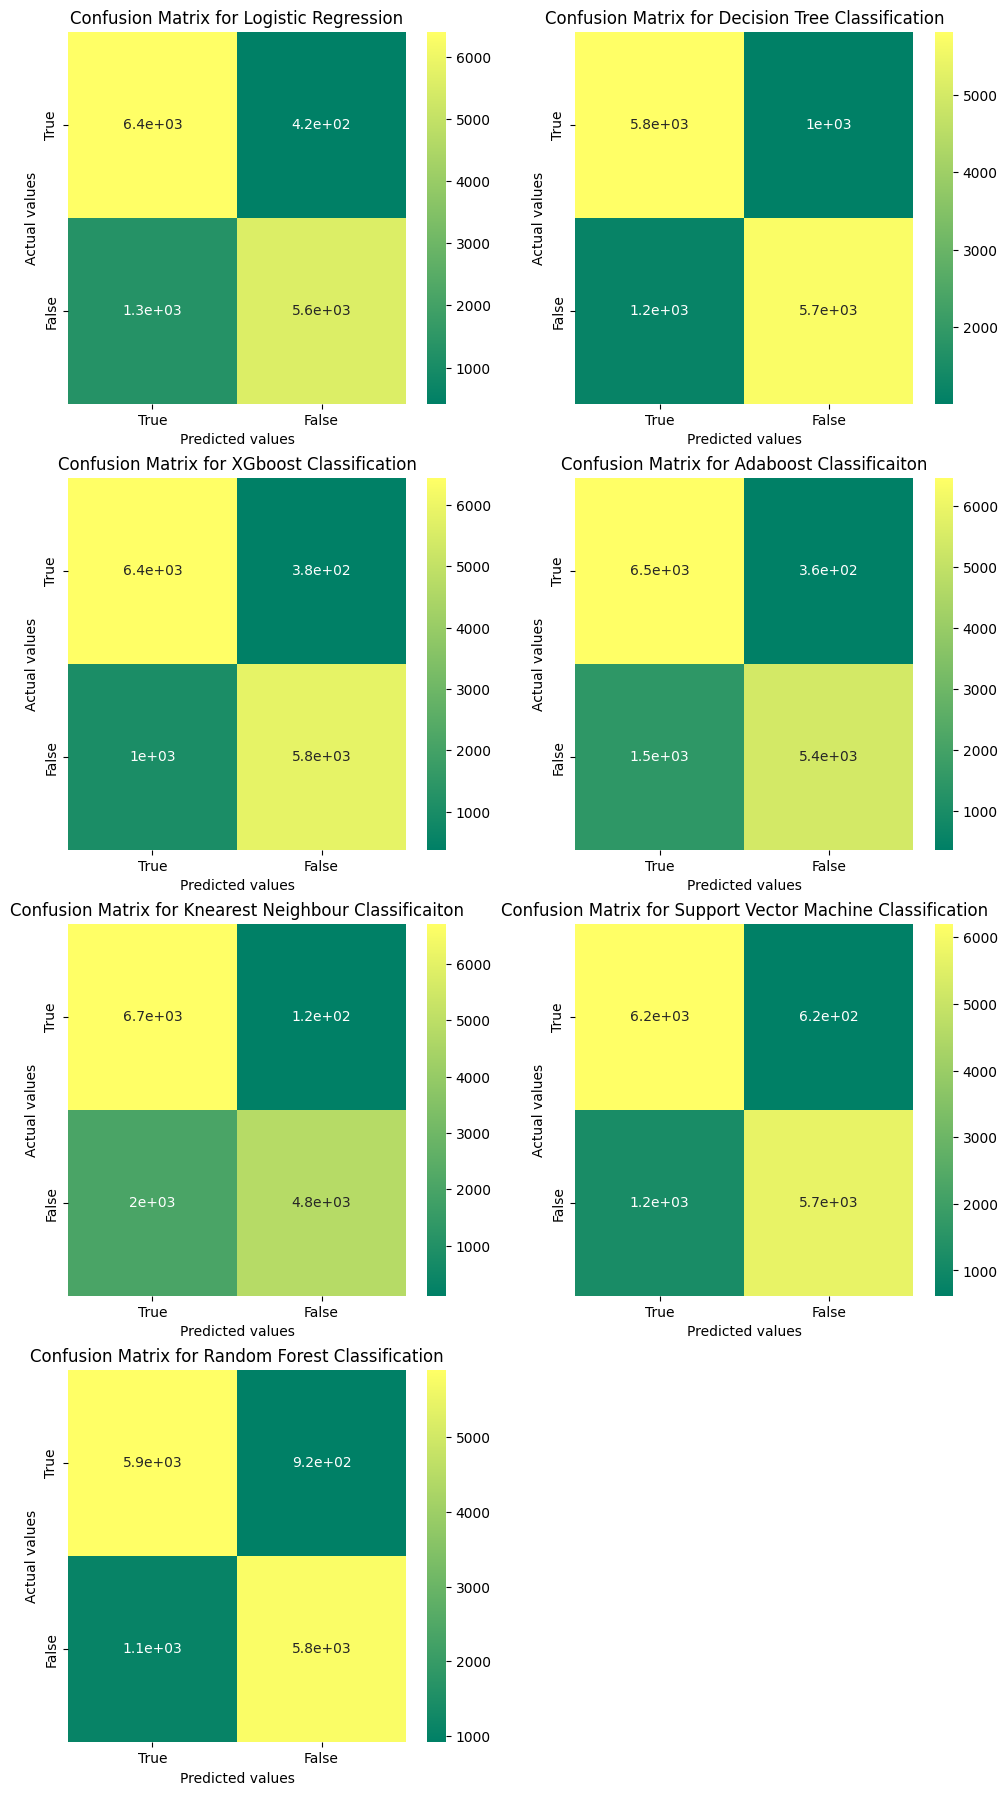

In [75]:
label_con=['True','False']

conf_mat=[cm_log,cm_dclf,cm_xgb,cm_ada,cm_neigh,cm_svm,cm_rfc]
algo=['Logistic Regression','Decision Tree Classification','XGboost Classification','Adaboost Classificaiton','Knearest Neighbour Classificaiton','Support Vector Machine Classification','Random Forest Classification']

plt.figure(figsize=(12,28))
for i in range(1,8):

    plt.subplot(5,2,i)
    sns.heatmap(conf_mat[i-1],cmap='summer',annot=True,xticklabels=label_con,yticklabels=label_con)
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title(f'Confusion Matrix for {algo[i-1]}',color='black')


ROC CURVE COMPARISON

<Figure size 1200x2800 with 0 Axes>

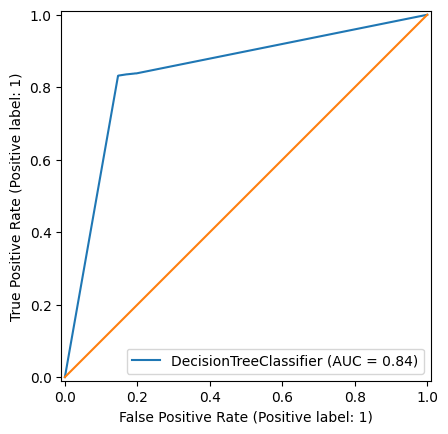

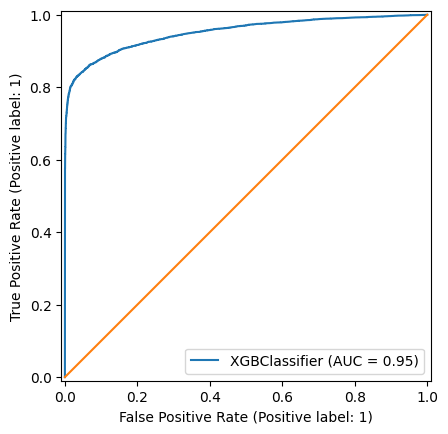

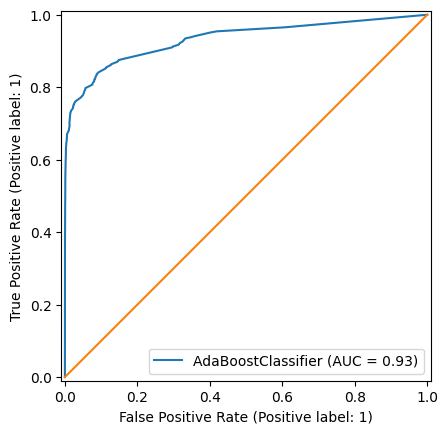

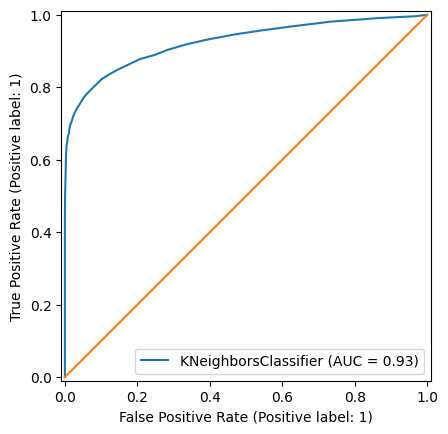

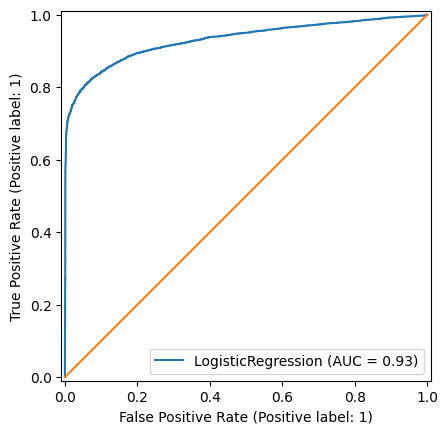

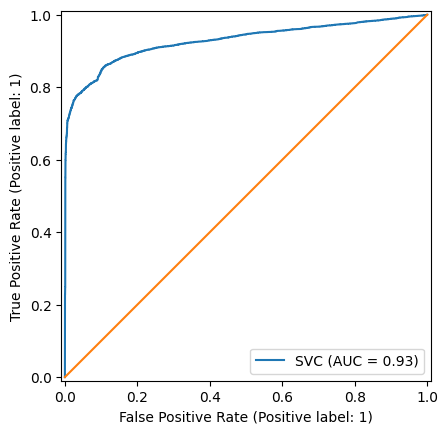

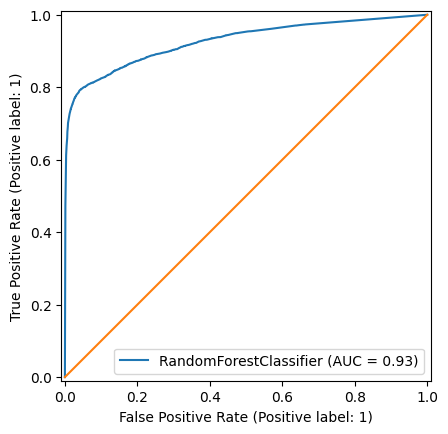

In [77]:
from sklearn.metrics import RocCurveDisplay
list=[clf,xgb,ada,neigh,log,svm,rt]
plt.figure(figsize=(12,28))
for i in range(1,8):
    RocCurveDisplay.from_estimator(list[i-1], xtest, ytest)
    plt.plot([0,1],[0,1])

GRADIO DEPLOYMENT

In [78]:
import gradio as gr

In [79]:
def heart(BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer):

    HeartDisease = rt.predict([[BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer]])
    return HeartDisease

In [83]:
interface = gr.Interface(
  fn = heart, #function = heart
  inputs = ['number','number','number','number','number','number','number','number','number',
            'number','number','number','number','number','number','number','number'],
  outputs = ['text']


).launch(share='FALSE')

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1416b89e2327cd3ad9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
